In [12]:
import numpy as np
import matplotlib.pyplot as  plt


UsageError: Line magic function `%` not found.


In [2]:
def hypothesis(x, theta0, theta1):
    y = theta0 + theta1 * x
    return y
    

In [3]:
x = np.array([1.0, 2.0, 3.0])
print(hypothesis(x, 0, 3))

[3. 6. 9.]


In [4]:
def cost(x, y, theta0, theta1):
    return (1/2*len(x)) * np.sum(np.square(hypothesis(x, theta0, theta1) - y))

In [5]:
def gradient(theta0, theta1, learning_rate, x, y, iter):
    t0 = theta0
    t1 = theta1
    history = []
    for i in range(iter):
        prediction = hypothesis(x, t0, t1)
        temp0 = t0 - learning_rate / len(x) * np.sum(prediction - y)
        temp1 = t1 - learning_rate / len(x) * np.sum(np.multiply((prediction - y), x))
        t0 = temp0
        t1 = temp1
        history.append([t0, t1])
    return history

In [6]:
x = np.array([1.,2.,3.,4.])
y = np.array([1.,2.,3.,4.])
theta0 = 0
theta1= 0
print(cost(x, y, theta0, theta1))
history = gradient(theta0, theta1, 0.1, x, y, 10)
theta0 = history[-1][0]
theta1 = history[-1][1]

60.0


In [7]:
hypothesis(x, theta0, theta1)

array([1.17300324, 2.08383189, 2.99466055, 3.90548921])

In [13]:
def visualize(thetas, x, y):
    plt.interactive(True)
    for i in range(len(thetas)):
        plt.plot(x, y, color='r', marker='x', linestyle='None')
        ts = thetas[i]
        predict = hypothesis(x, ts[0], ts[1])
        plt.plot(x, predict, color='blue')
        plt.show()
        plt.clf()

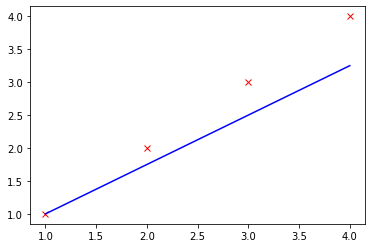

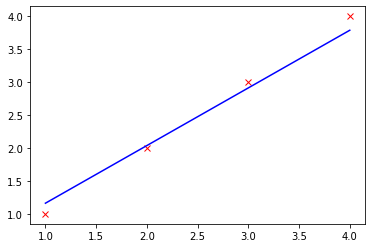

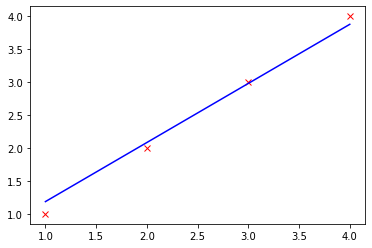

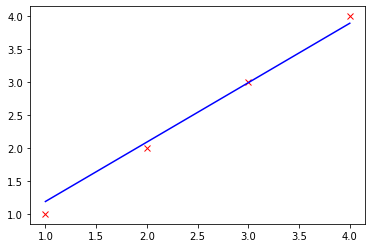

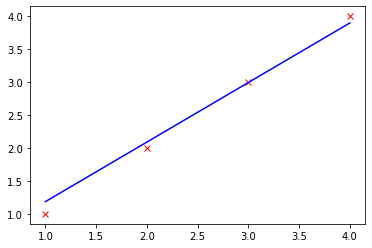

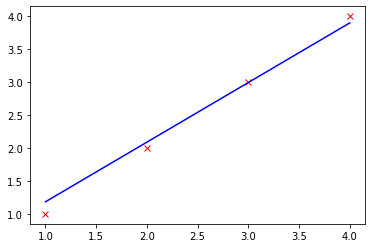

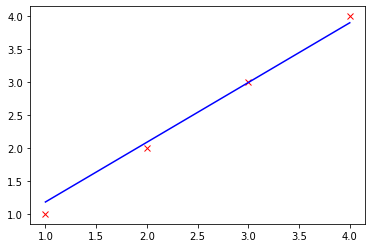

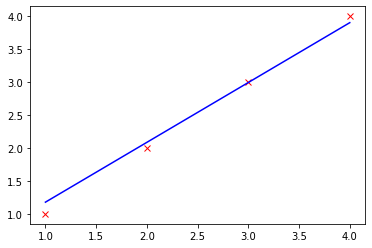

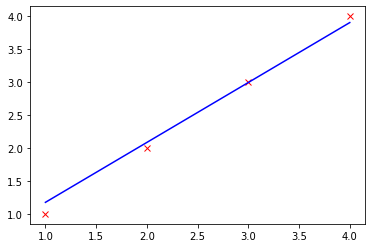

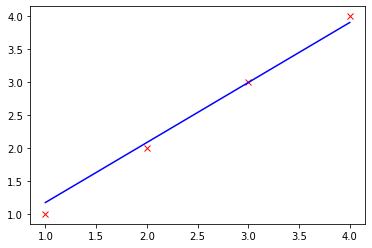

<Figure size 432x288 with 0 Axes>

In [14]:
visualize(history, x, y)